In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from anndata import AnnData
import glob
import os
import numpy as np
import scanpy as sc
from tqdm.notebook import tqdm
from core_functions.processing_and_filtering import *

#### Filtering low quality cells before postprocessing. Enter the path to the data folder with the MERSCOPE adatas. 

In [2]:
data_dir = 'D:/amonell/merscope_final'

In [3]:
input_folders = glob.glob(os.path.join(data_dir, 'SI*'))

In [6]:
 
def qc_before_clustering(
    adata,
    min_transcript_threshold=20, 
    max_transcript_threshold=2500, 
    min_unique_transcripts= 8, 
    max_unique_transcripts= 600, 
):
    print(f'{len(adata.obs.index)} cells before QC filtering')
    adata = adata[(adata.obs['total_transcripts'] > min_transcript_threshold) & (adata.obs['total_transcripts'] < max_transcript_threshold), :]
    adata = adata[(adata.obs['unique_transcripts'] > min_unique_transcripts) & (adata.obs['unique_transcripts'] < max_unique_transcripts), :]

    print(f'{len(adata.obs.index)} cells after QC filtering')
    
    return adata

#### We used default parameters for the filtering, but you can choose different when prompted.

  0%|          | 0/6 [00:00<?, ?it/s]

QC metrics for batch SI-Ctrl-L-RAR-R-dist-1-VS120-NP_Beta8
quality directory already made


C:\Users\amonell\Desktop\Organized Processing - MERFISH\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


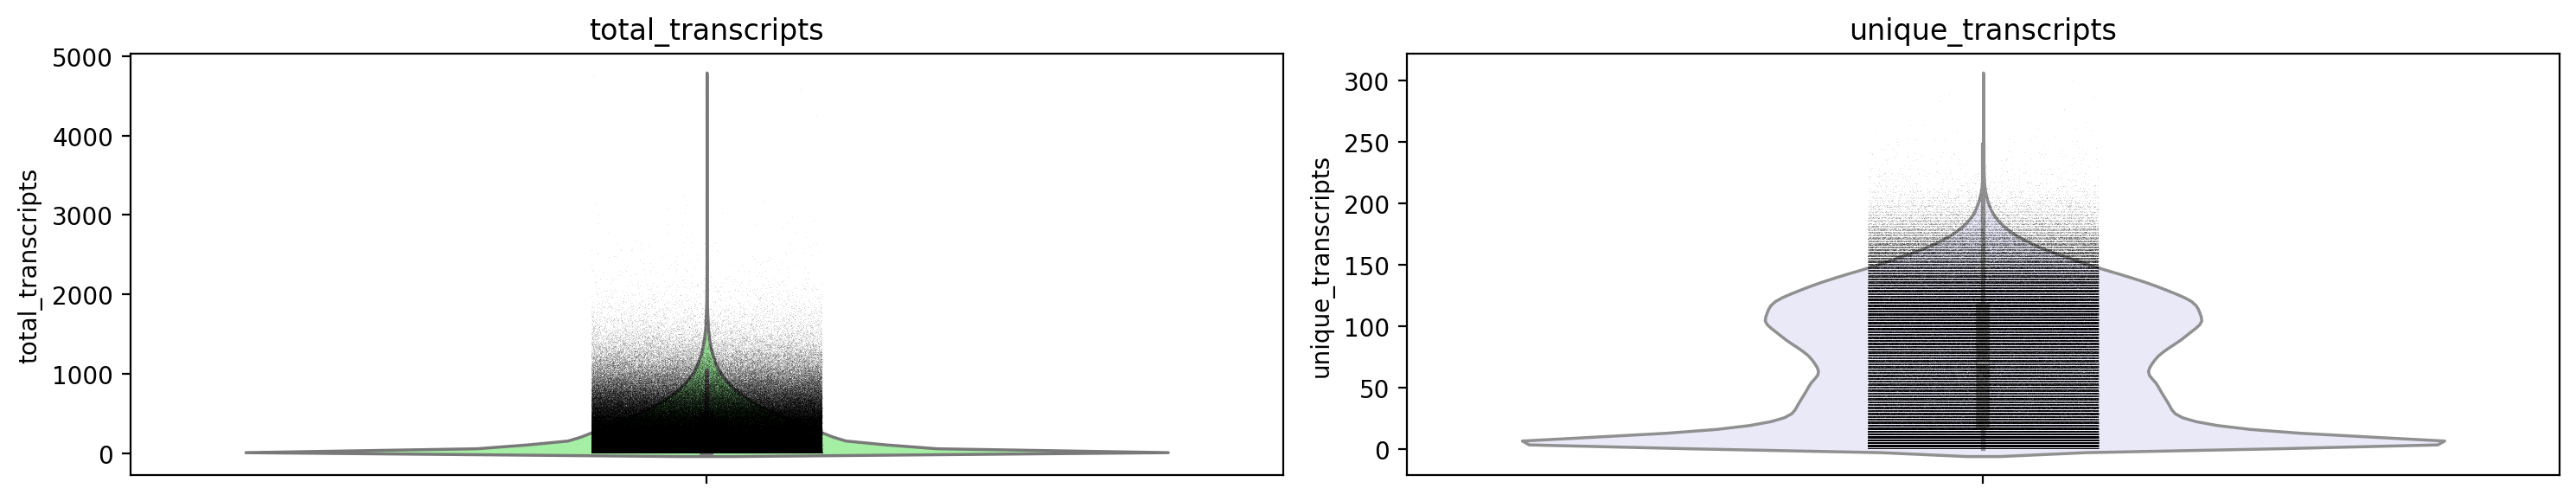

Do you want to use default filtering cutoffs (y/n)? y


849999 cells before QC filtering
689785 cells after QC filtering
QC metrics for batch SI-Ctrl-L-RARi-R-prox2-VS120-NP_VMSC00201


C:\Users\amonell\Desktop\Organized Processing - MERFISH\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


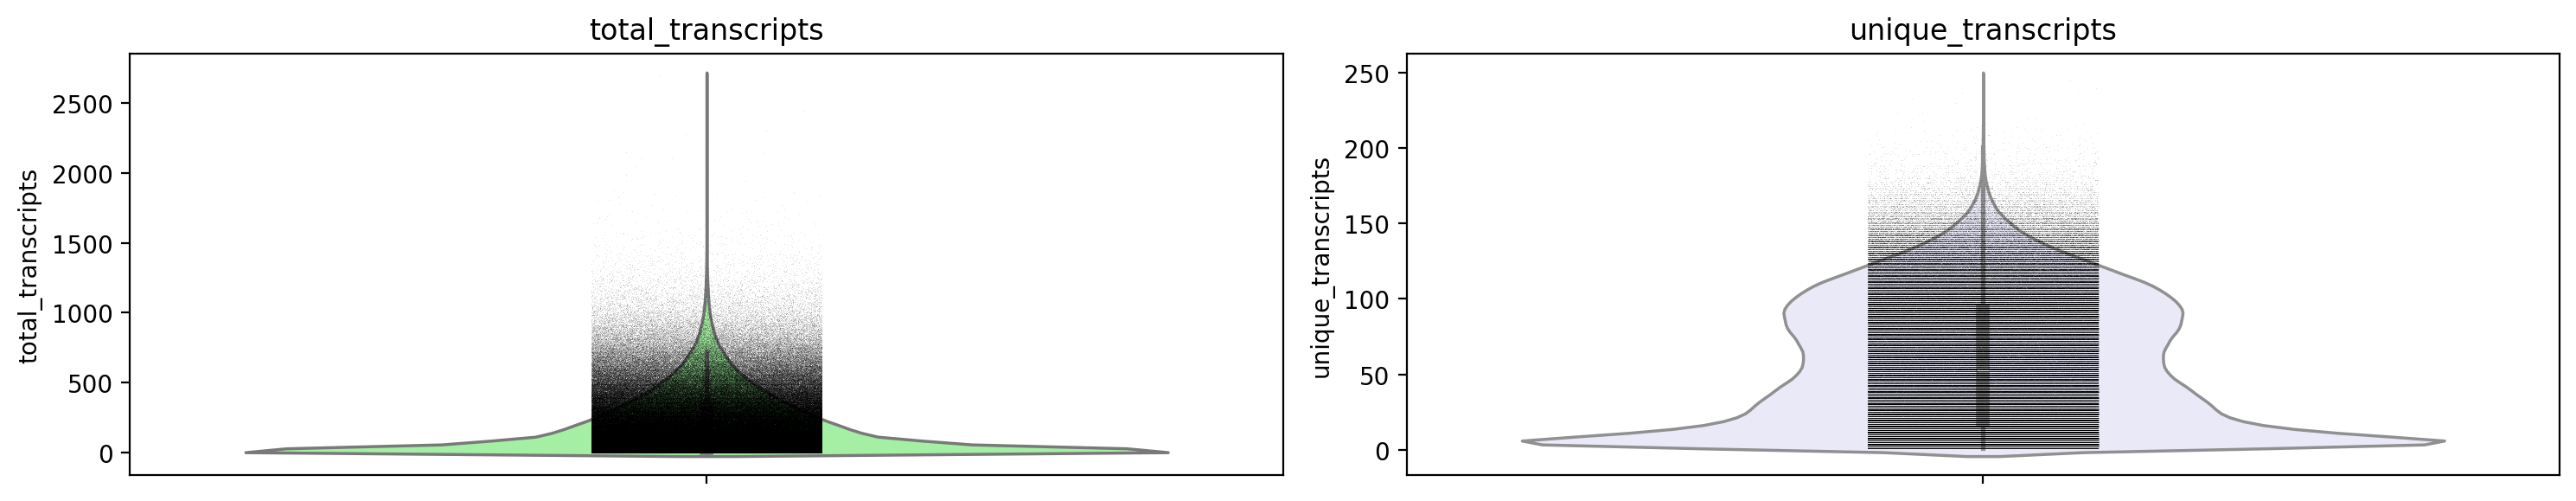

Do you want to use default filtering cutoffs (y/n)? y


938360 cells before QC filtering
745471 cells after QC filtering
QC metrics for batch SI-RARi-DMSO-12-20-22-2-VS120-NP_Beta10


C:\Users\amonell\Desktop\Organized Processing - MERFISH\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


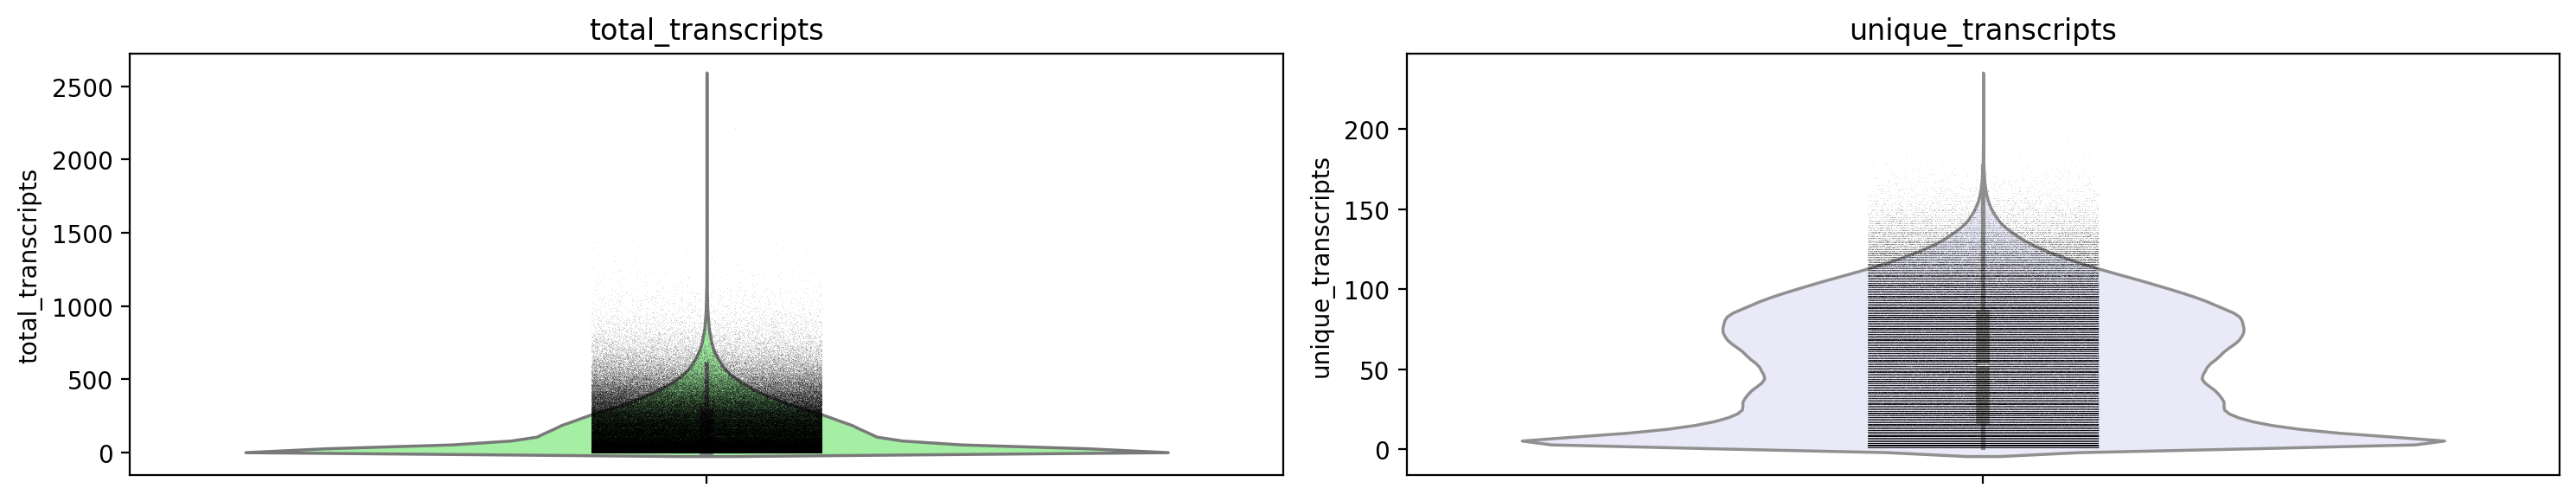

Do you want to use default filtering cutoffs (y/n)? y


527142 cells before QC filtering
420800 cells after QC filtering
QC metrics for batch SI-RARi-DMSO-12-20-22-VS120-NP_VMSC07201


C:\Users\amonell\Desktop\Organized Processing - MERFISH\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


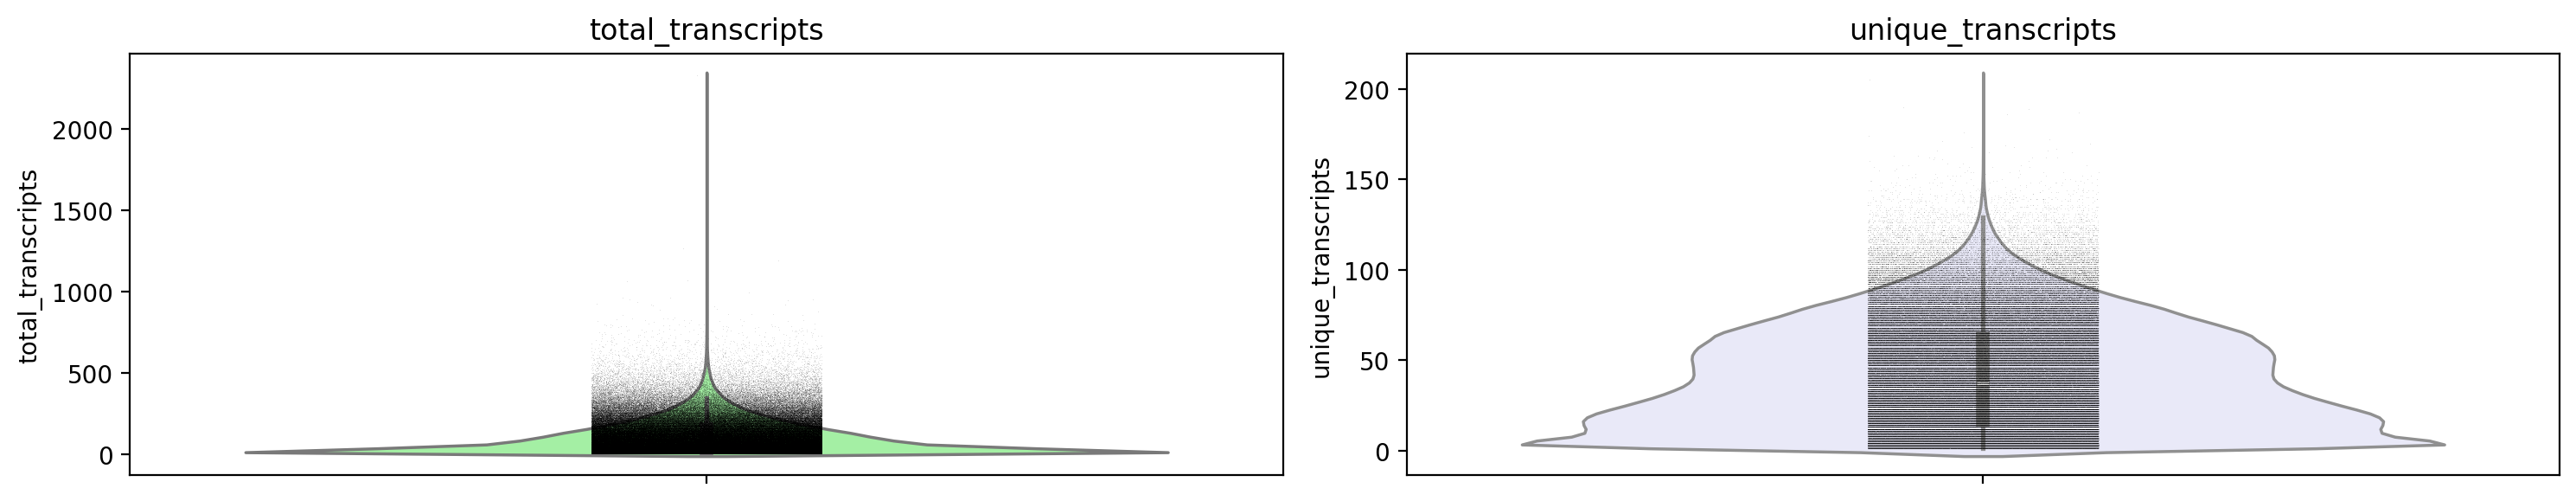

Do you want to use default filtering cutoffs (y/n)? y


479790 cells before QC filtering
376969 cells after QC filtering
QC metrics for batch SI-WT-KO-12-30-22-VS120-NP_Beta10


C:\Users\amonell\Desktop\Organized Processing - MERFISH\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


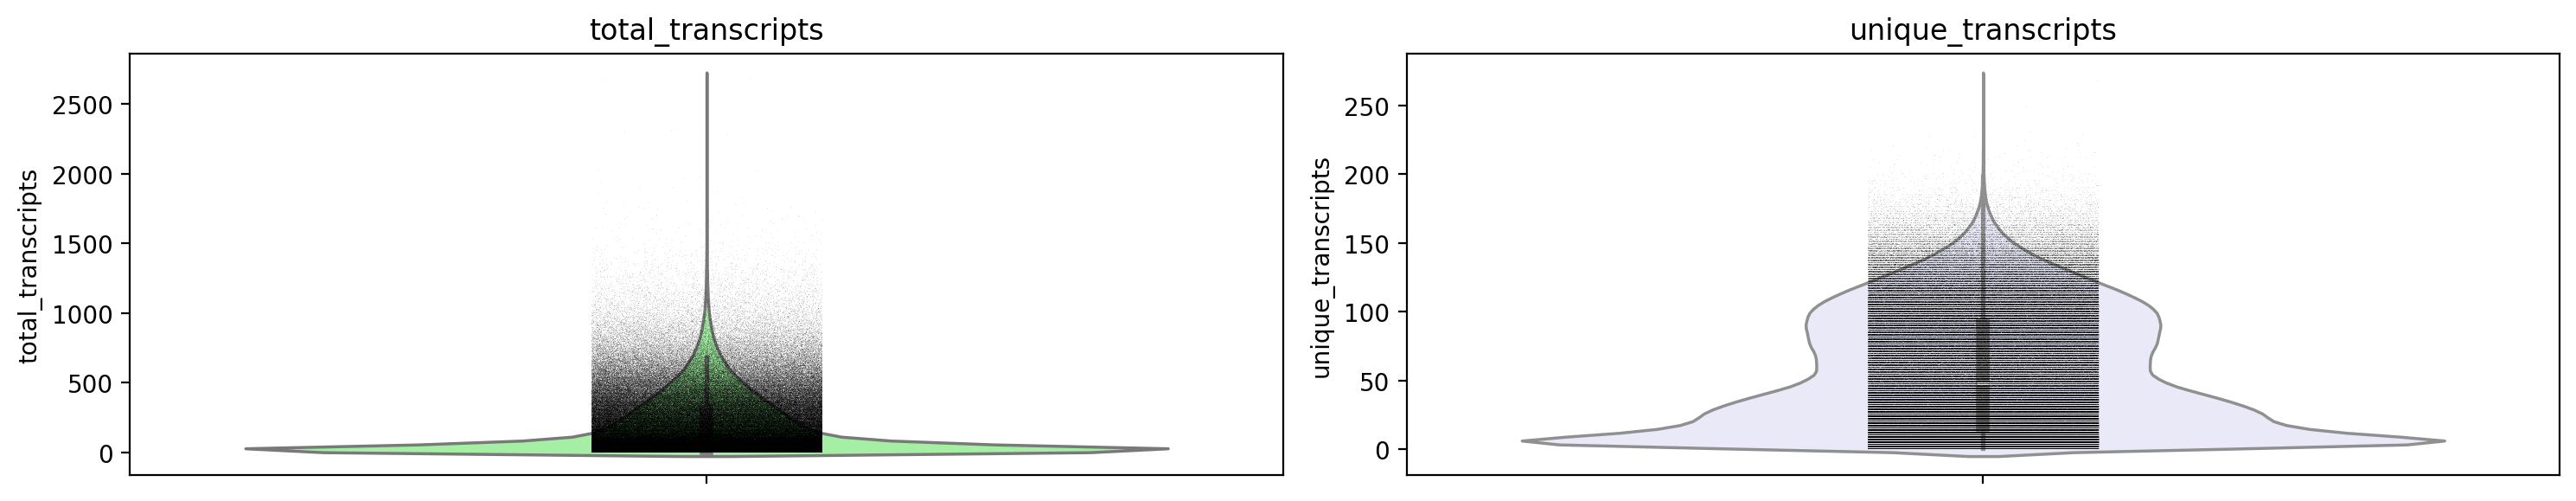

Do you want to use default filtering cutoffs (y/n)? y


649860 cells before QC filtering
507567 cells after QC filtering
QC metrics for batch SI-WT-KO-TGFbRTG-12-30-22-VS120-NP_VMSC07101


C:\Users\amonell\Desktop\Organized Processing - MERFISH\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


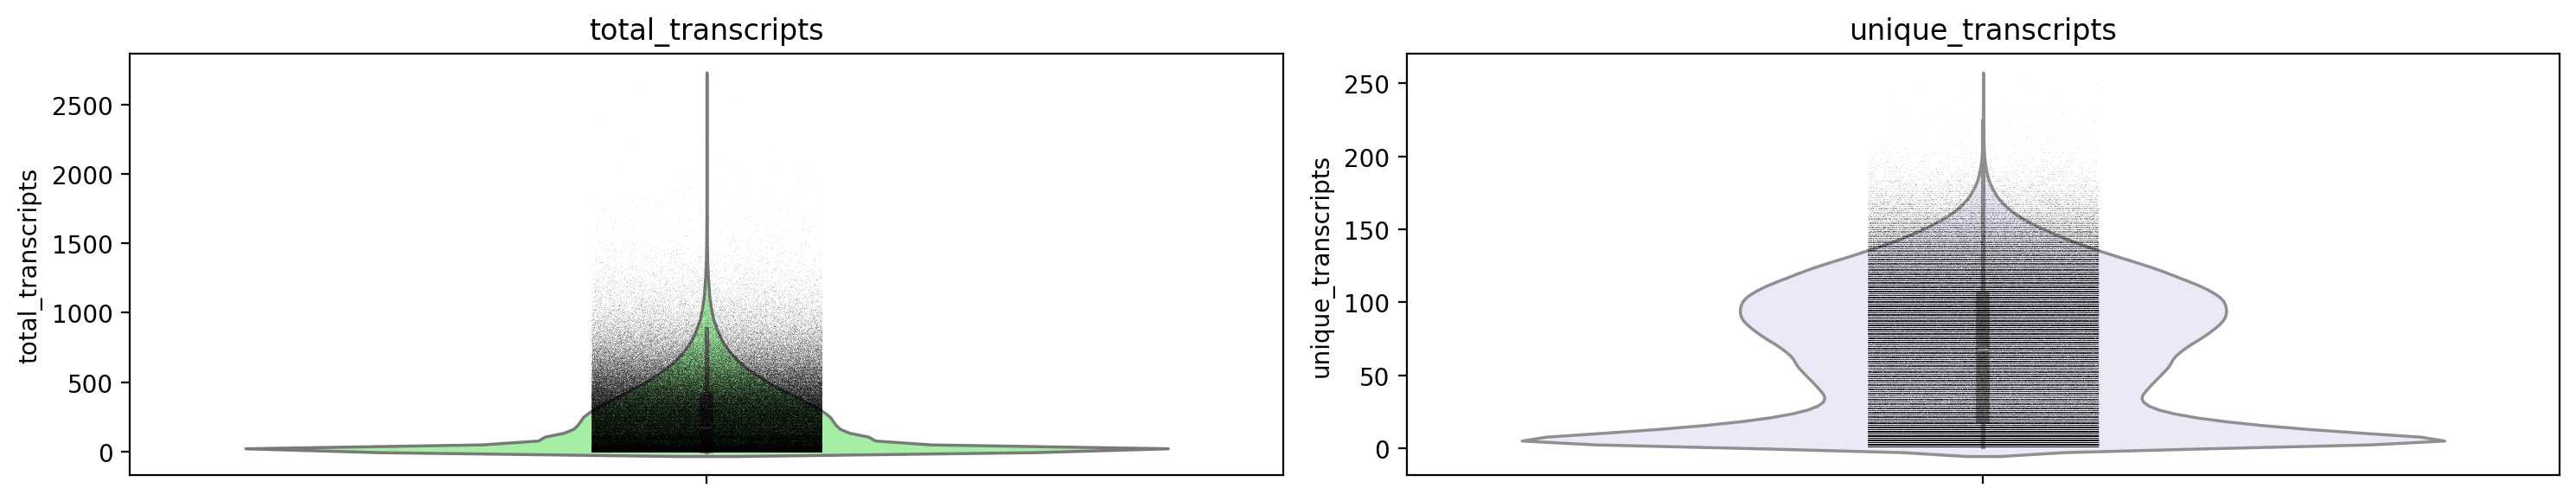

Do you want to use default filtering cutoffs (y/n)? y


546133 cells before QC filtering
435484 cells after QC filtering


In [7]:
for input_file in tqdm(input_folders):
    experiment = sc.read(os.path.join(input_file, 'adatas', '01_preprocessed.h5ad')) 
    # experiment = experiment[1:, :]
    experiment.obs['total_transcripts'] = np.sum(experiment.X, axis=1)
    experiment.obs['unique_transcripts'] = np.count_nonzero(experiment.X, axis=1)
    try:
        df = pd.DataFrame(experiment.X.A, columns=experiment.var.index.values, index=experiment.obs.index.values)
    except:
        df = pd.DataFrame(experiment.X, columns=experiment.var.index.values, index=experiment.obs.index.values)

    metadata = experiment.obs
    print('QC metrics for batch '+os.path.basename(input_file))

    plot_qc_feature(df, metadata, os.path.join(input_file), False)

    default_parameters = input('Do you want to use default filtering cutoffs (y/n)?')

    if default_parameters == 'n':

        min_transcript_threshold = float(input("Min transcripts threshold: "))
        max_transcript_threshold = float(input("Max transcripts threshold: "))
    
        min_unique_transcripts = float(input("Min unique transcripts: "))
        max_unique_transcripts = float(input("Max unique transcripts: "))
    
        min_cyto_transcripts = float(input("Min cyto transcripts: "))
        max_cyto_transcripts = float(input("Max cyto transcripts: "))
    
        min_nuc_pct = float(input("Min nuclear transcripts / total transcripts: "))
        max_nuc_pct = float(input("Max nuclear transcripts / total transcripts: "))

        experiment = qc_before_clustering(experiment, min_transcript_threshold, max_transcript_threshold, min_unique_transcripts, max_unique_transcripts)
    else:
        experiment = qc_before_clustering(experiment)

    experiment.write(os.path.join(input_file, 'adatas', '02_preprocessed_and_filtered.h5ad'))